In [1]:
from pandas import read_csv
from matplotlib import pyplot
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras import Model

from keras.models import Sequential
from keras.layers import Dense, Input, Attention
from keras.layers import LSTM
from keras.layers import Layer
from keras.layers import *
from keras.models import *
from keras import backend as K

from keras.layers import SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

In [2]:
def load_data():
    dataset = read_csv('solar_AL.txt', header=0, usecols = [2], engine='python')
    # dataset = read_csv('data_myrtle.csv', header=0, usecols = [2], engine='python')

    dataset[:] = numpy.nan_to_num(dataset)    
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    
    return scaler, dataset

In [3]:
def create_dataset(dataset, look_back=1, look_ahead=0):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back - look_ahead-1):
        a = dataset[i:(i+look_back), 0]
        
        dataX.append(a)
        dataY.append(dataset[i + look_back + look_ahead, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [4]:
def make_model():
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(16, activation = 'tanh', kernel_initializer = 'he_normal'))
    model.add(Dense(8, activation = 'tanh', kernel_initializer = 'he_normal'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.compile(loss='mse', optimizer='adam') 
    model.summary()
    return model

In [5]:
def fit_generator(model, trainX, trainY, testY):  
    model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    traingen = trainPredict
    testgen = testPredict

    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    gen_testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
#     trainPredict = model(trainX)
#     gen_testPredict = model(testX)
    return trainPredict, gen_testPredict, testY, trainY

In [6]:
def gen_results(trainY, testY, trainPredict, gen_testPredict):
#     trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))

#     print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error([testY][0], gen_testPredict))
#     print('Test Score: %.2f RMSE' % (testScore))
    
    return testScore

In [7]:
def init_discriminator(dataset, trainX, trainY, testY):
    dataset = scaler.inverse_transform(dataset)
#     print(trainX)
    trainY = dataset[1 : train_size - 1 - look_ahead] - trainPredict[:]
    testY = dataset[train_size + look_ahead: - 2] - gen_testPredict[:]

    trainY = scaler.fit_transform(trainY)
    testY = scaler.fit_transform(testY)
    return dataset, trainX, trainY, testY

In [8]:
def fit_discriminator(disc_model, trainX, textX, trainY, testY):

#     disc_model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
#     trainPredict = model.predict(trainX)
#     testPredict = model.predict(testX)

#     # invert predictions
#     trainPredict = scaler.inverse_transform(trainPredict)
#     trainY = scaler.inverse_transform(trainY)
#     disc_testPredict = scaler.inverse_transform(testPredict)
#     testY = scaler.inverse_transform(testY)
    trainPredict = model(trainX)
    disc_testPredict = model(testX)
    return disc_testPredict, trainPredict, testY, trainY

In [9]:
def disc_results(testPredict, trainY, testY, disc_testPredict):
#     print(testPredict)
#     print(testY)
#     trainScore = math.sqrt(mean_squared_error([testY][0], testPredict))
#     print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY, disc_testPredict))
#     print('Test Score: %.2f RMSE' % (testScore))
    return testScore

In [10]:
def final_result(gen_testPredict, disc_testPredict):
    y_final = gen_testPredict + disc_testPredict
#     print(y_final)
#     print(dataset[train_size + 1: -1])

    trainScore = math.sqrt(mean_squared_error(y_final, dataset[train_size + look_ahead: - 2]))
#     print('Score: %.2f RMSE' % (trainScore))
#     plt.plot(dataset[train_size:])
#     plt.plot(y_final)
    return trainScore

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 4)                 96        
                                                                 
 dense_90 (Dense)            (None, 16)                80        
                                                                 
 dense_91 (Dense)            (None, 8)                 136       
                                                                 
 dense_92 (Dense)            (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
0
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (

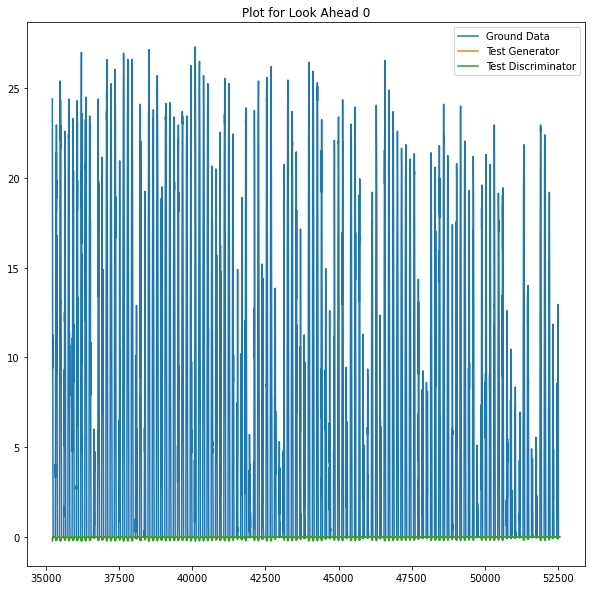

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 4)                 96        
                                                                 
 dense_96 (Dense)            (None, 16)                80        
                                                                 
 dense_97 (Dense)            (None, 8)                 136       
                                                                 
 dense_98 (Dense)            (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
1
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (

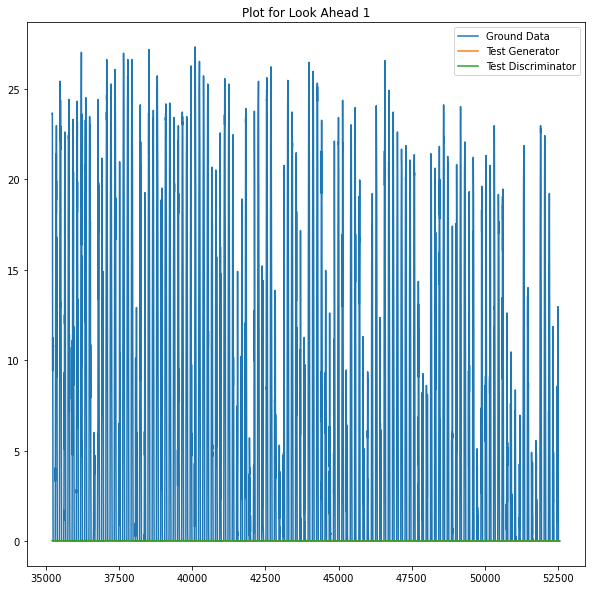

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 4)                 96        
                                                                 
 dense_102 (Dense)           (None, 16)                80        
                                                                 
 dense_103 (Dense)           (None, 8)                 136       
                                                                 
 dense_104 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
2
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_35 (LSTM)              (

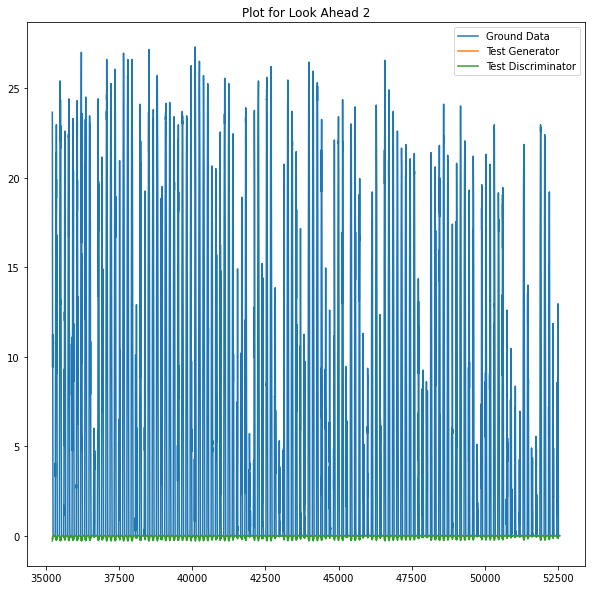

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 4)                 96        
                                                                 
 dense_108 (Dense)           (None, 16)                80        
                                                                 
 dense_109 (Dense)           (None, 8)                 136       
                                                                 
 dense_110 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
3
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_37 (LSTM)              (

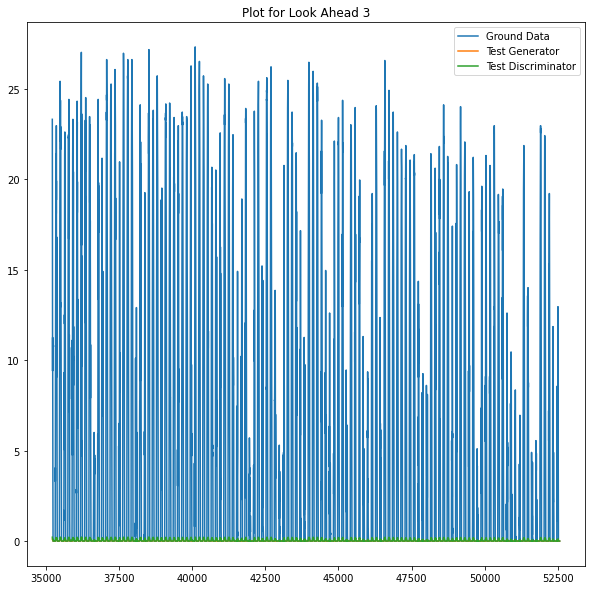

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 4)                 96        
                                                                 
 dense_114 (Dense)           (None, 16)                80        
                                                                 
 dense_115 (Dense)           (None, 8)                 136       
                                                                 
 dense_116 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
4
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (

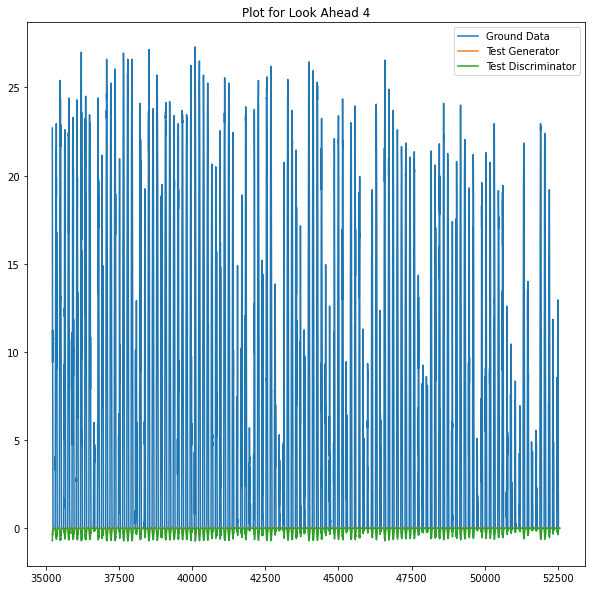

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 4)                 96        
                                                                 
 dense_120 (Dense)           (None, 16)                80        
                                                                 
 dense_121 (Dense)           (None, 8)                 136       
                                                                 
 dense_122 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
5
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_41 (LSTM)              (

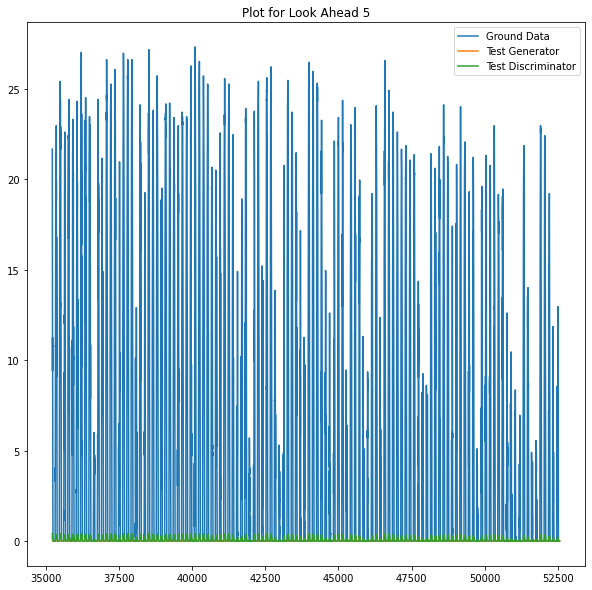

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 4)                 96        
                                                                 
 dense_126 (Dense)           (None, 16)                80        
                                                                 
 dense_127 (Dense)           (None, 8)                 136       
                                                                 
 dense_128 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
6
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_43 (LSTM)              (

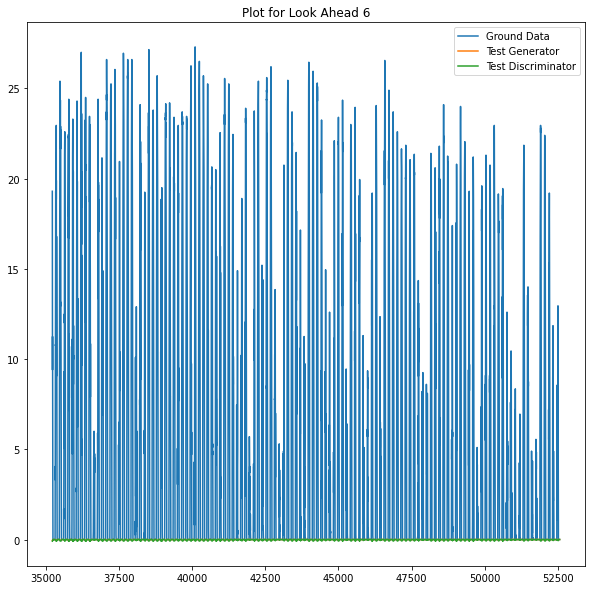

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 4)                 96        
                                                                 
 dense_132 (Dense)           (None, 16)                80        
                                                                 
 dense_133 (Dense)           (None, 8)                 136       
                                                                 
 dense_134 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
7
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (

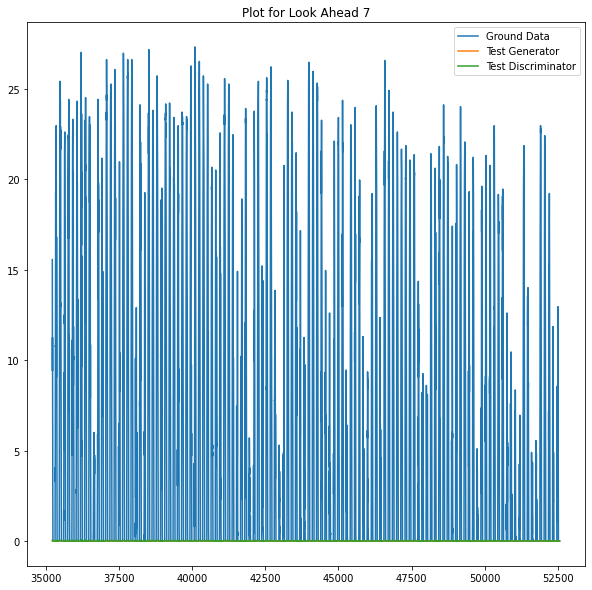

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 4)                 96        
                                                                 
 dense_138 (Dense)           (None, 16)                80        
                                                                 
 dense_139 (Dense)           (None, 8)                 136       
                                                                 
 dense_140 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
8
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_47 (LSTM)              (

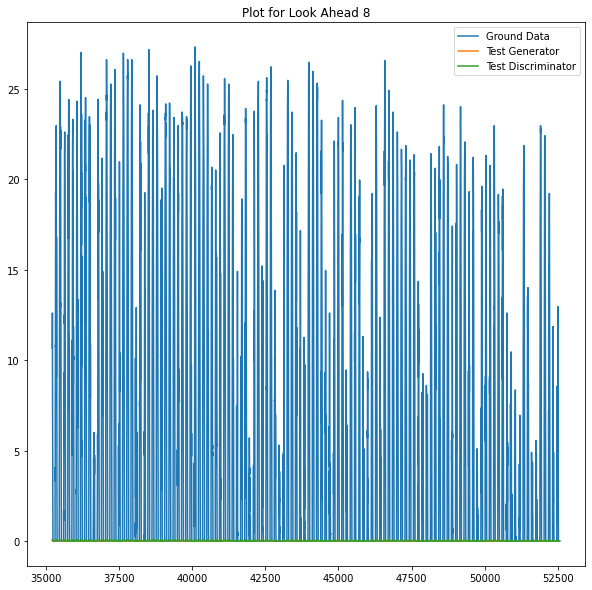

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 4)                 96        
                                                                 
 dense_144 (Dense)           (None, 16)                80        
                                                                 
 dense_145 (Dense)           (None, 8)                 136       
                                                                 
 dense_146 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
9
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_49 (LSTM)              (

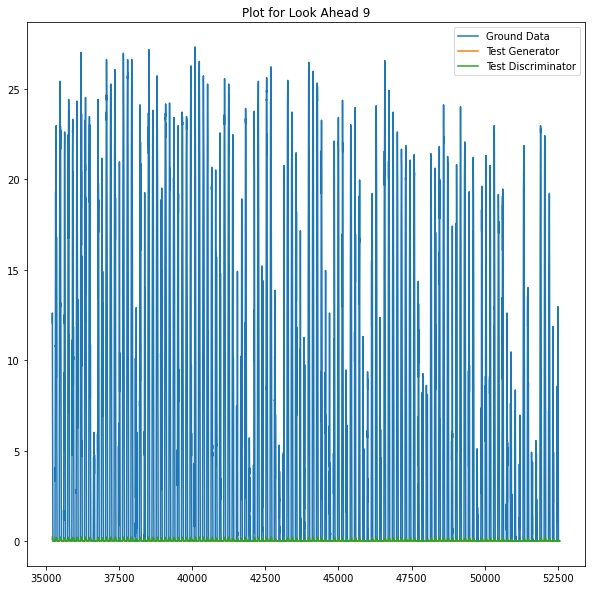

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 4)                 96        
                                                                 
 dense_150 (Dense)           (None, 16)                80        
                                                                 
 dense_151 (Dense)           (None, 8)                 136       
                                                                 
 dense_152 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
10
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_51 (LSTM)              

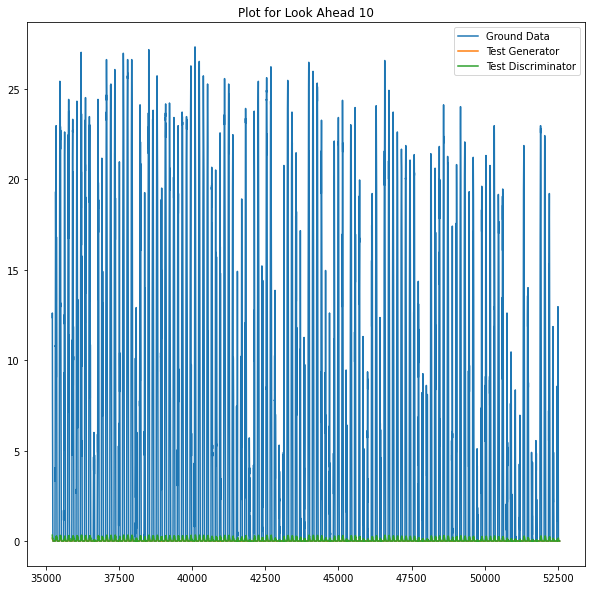

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_52 (LSTM)              (None, 4)                 96        
                                                                 
 dense_156 (Dense)           (None, 16)                80        
                                                                 
 dense_157 (Dense)           (None, 8)                 136       
                                                                 
 dense_158 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
11
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_53 (LSTM)              

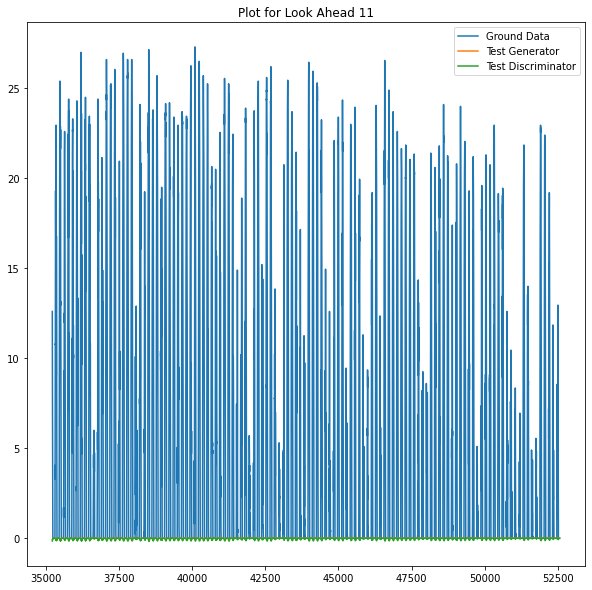

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, 4)                 96        
                                                                 
 dense_162 (Dense)           (None, 16)                80        
                                                                 
 dense_163 (Dense)           (None, 8)                 136       
                                                                 
 dense_164 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
12
Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_55 (LSTM)              

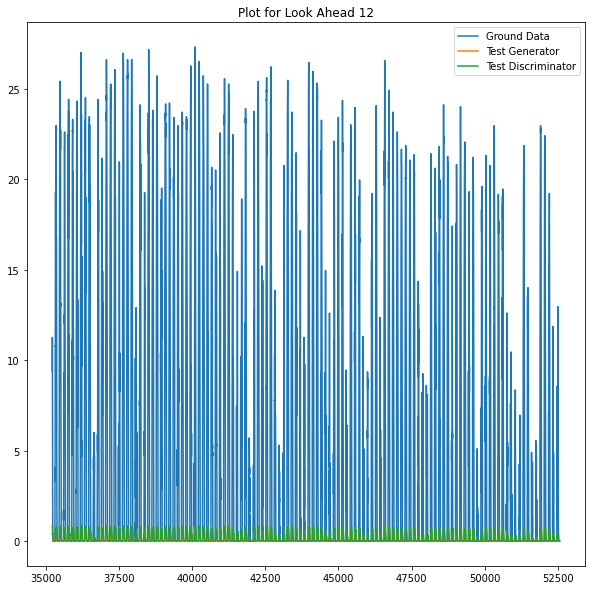

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 4)                 96        
                                                                 
 dense_168 (Dense)           (None, 16)                80        
                                                                 
 dense_169 (Dense)           (None, 8)                 136       
                                                                 
 dense_170 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
13
Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_57 (LSTM)              

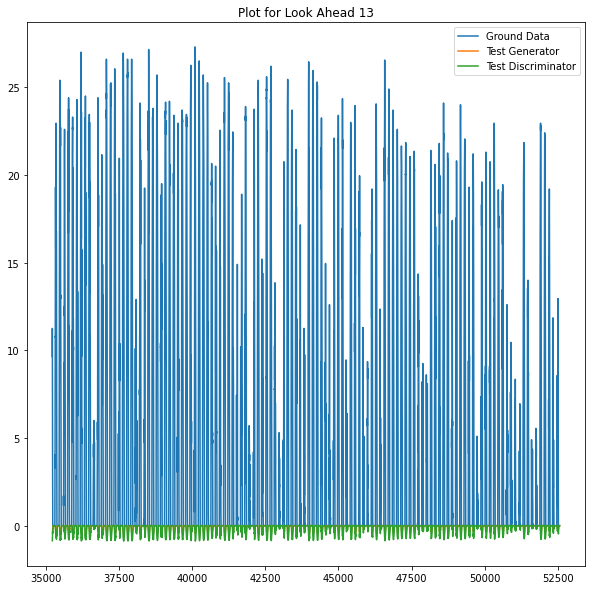

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_58 (LSTM)              (None, 4)                 96        
                                                                 
 dense_174 (Dense)           (None, 16)                80        
                                                                 
 dense_175 (Dense)           (None, 8)                 136       
                                                                 
 dense_176 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
14
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_59 (LSTM)              

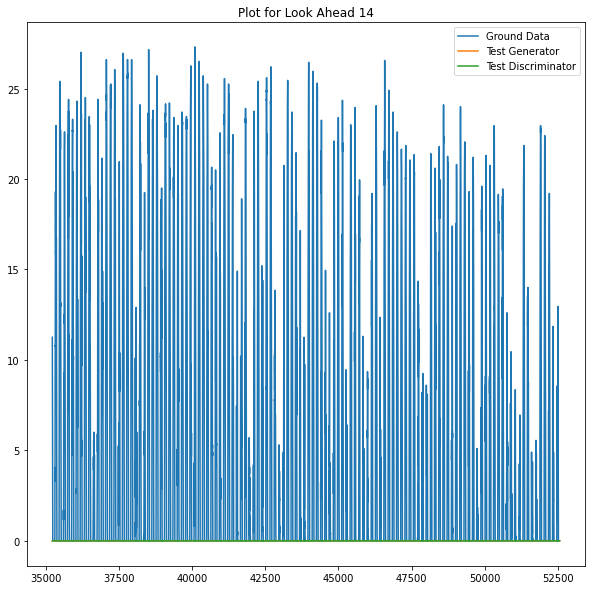

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 4)                 96        
                                                                 
 dense_180 (Dense)           (None, 16)                80        
                                                                 
 dense_181 (Dense)           (None, 8)                 136       
                                                                 
 dense_182 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
15
Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_61 (LSTM)              

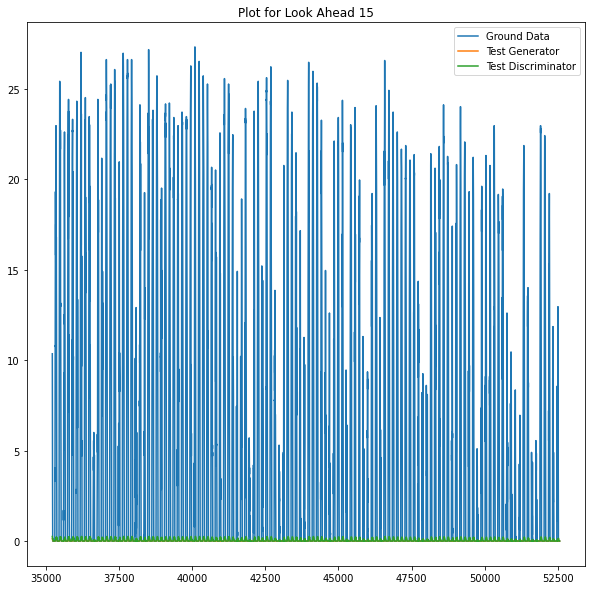

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_62 (LSTM)              (None, 4)                 96        
                                                                 
 dense_186 (Dense)           (None, 16)                80        
                                                                 
 dense_187 (Dense)           (None, 8)                 136       
                                                                 
 dense_188 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
16
Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_63 (LSTM)              

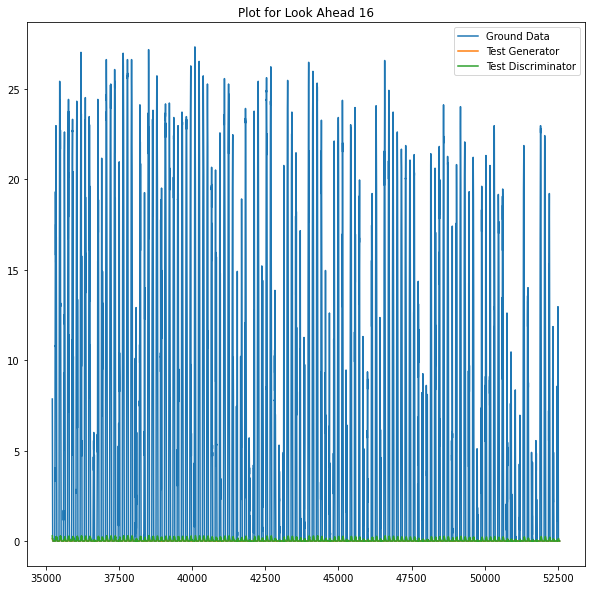

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_64 (LSTM)              (None, 4)                 96        
                                                                 
 dense_192 (Dense)           (None, 16)                80        
                                                                 
 dense_193 (Dense)           (None, 8)                 136       
                                                                 
 dense_194 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
17
Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_65 (LSTM)              

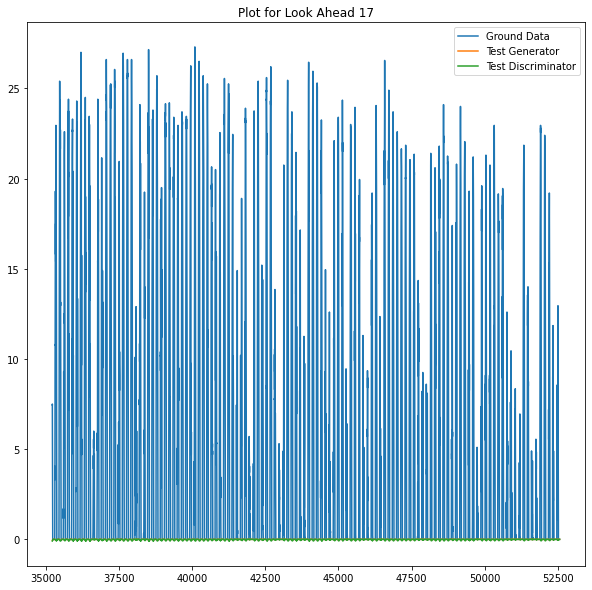

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_66 (LSTM)              (None, 4)                 96        
                                                                 
 dense_198 (Dense)           (None, 16)                80        
                                                                 
 dense_199 (Dense)           (None, 8)                 136       
                                                                 
 dense_200 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
18
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_67 (LSTM)              

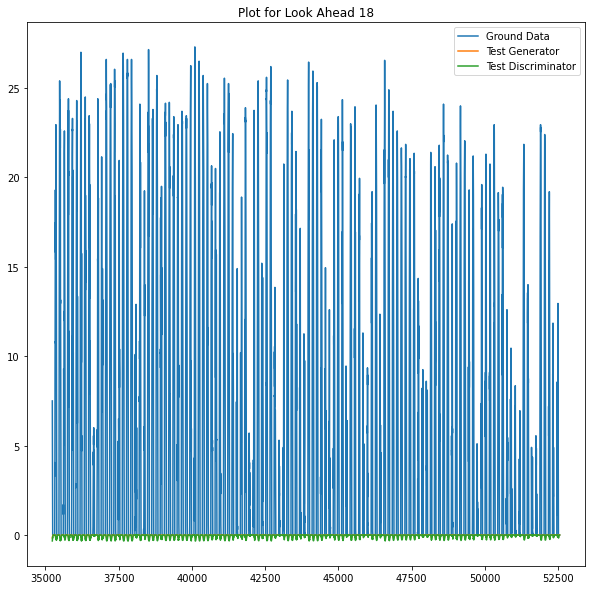

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_68 (LSTM)              (None, 4)                 96        
                                                                 
 dense_204 (Dense)           (None, 16)                80        
                                                                 
 dense_205 (Dense)           (None, 8)                 136       
                                                                 
 dense_206 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
19
Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_69 (LSTM)              

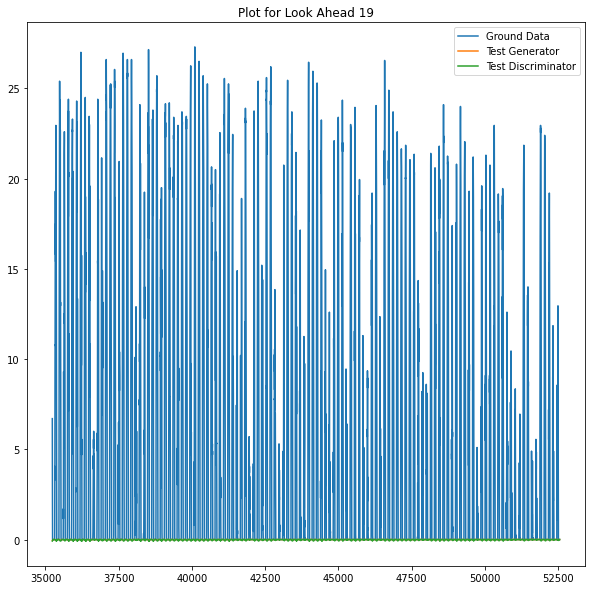

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_70 (LSTM)              (None, 4)                 96        
                                                                 
 dense_210 (Dense)           (None, 16)                80        
                                                                 
 dense_211 (Dense)           (None, 8)                 136       
                                                                 
 dense_212 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
20
Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_71 (LSTM)              

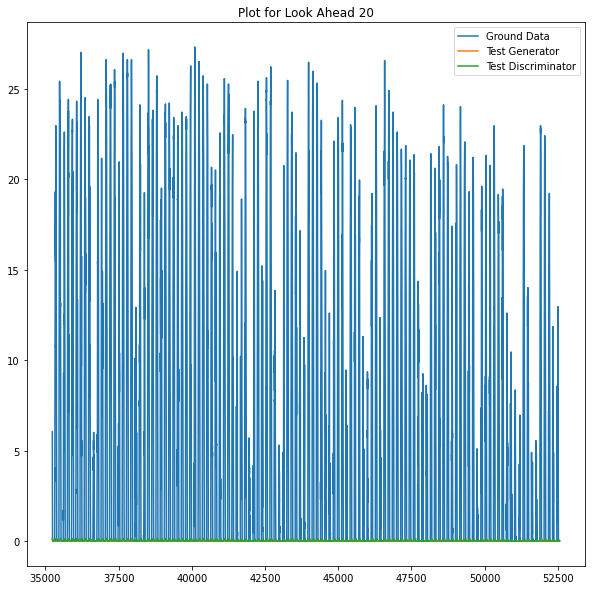

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_72 (LSTM)              (None, 4)                 96        
                                                                 
 dense_216 (Dense)           (None, 16)                80        
                                                                 
 dense_217 (Dense)           (None, 8)                 136       
                                                                 
 dense_218 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
21
Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_73 (LSTM)              

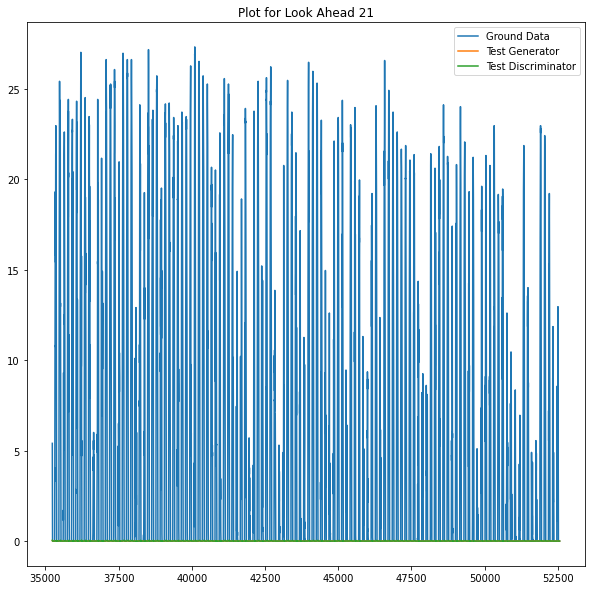

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_74 (LSTM)              (None, 4)                 96        
                                                                 
 dense_222 (Dense)           (None, 16)                80        
                                                                 
 dense_223 (Dense)           (None, 8)                 136       
                                                                 
 dense_224 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
22
Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_75 (LSTM)              

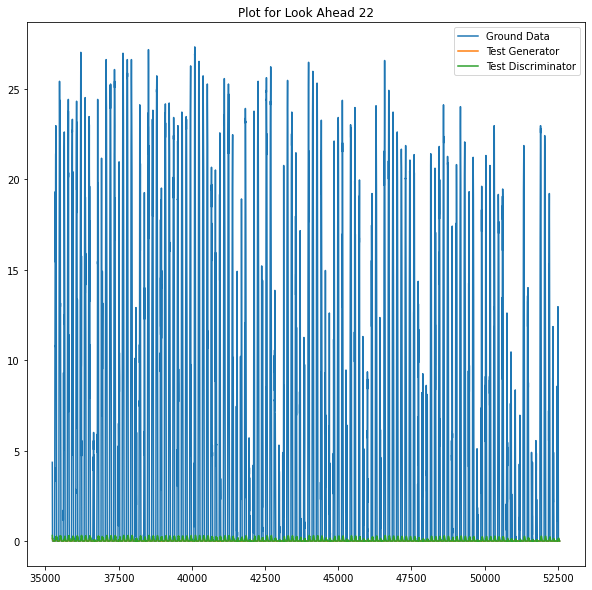

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_76 (LSTM)              (None, 4)                 96        
                                                                 
 dense_228 (Dense)           (None, 16)                80        
                                                                 
 dense_229 (Dense)           (None, 8)                 136       
                                                                 
 dense_230 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
23
Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_77 (LSTM)              

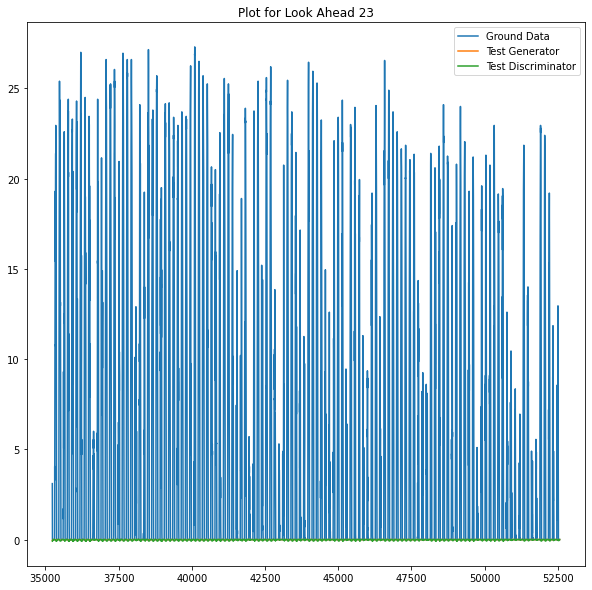

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_78 (LSTM)              (None, 4)                 96        
                                                                 
 dense_234 (Dense)           (None, 16)                80        
                                                                 
 dense_235 (Dense)           (None, 8)                 136       
                                                                 
 dense_236 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
24
Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_79 (LSTM)              

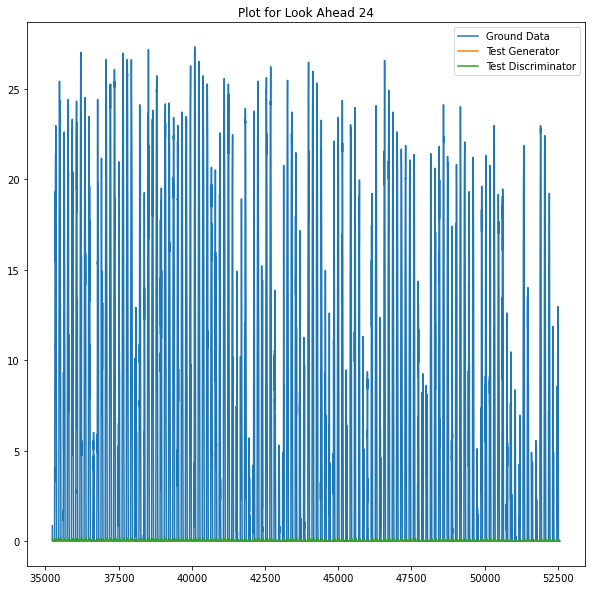

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_80 (LSTM)              (None, 4)                 96        
                                                                 
 dense_240 (Dense)           (None, 16)                80        
                                                                 
 dense_241 (Dense)           (None, 8)                 136       
                                                                 
 dense_242 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
25
Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_81 (LSTM)              

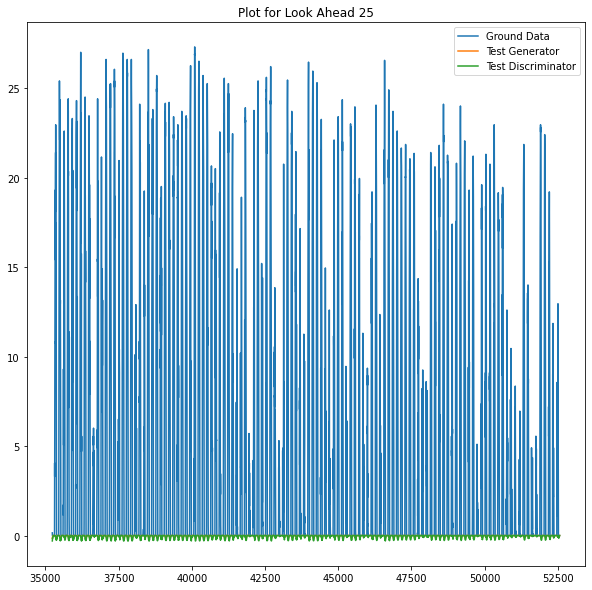

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_82 (LSTM)              (None, 4)                 96        
                                                                 
 dense_246 (Dense)           (None, 16)                80        
                                                                 
 dense_247 (Dense)           (None, 8)                 136       
                                                                 
 dense_248 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
26
Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_83 (LSTM)              

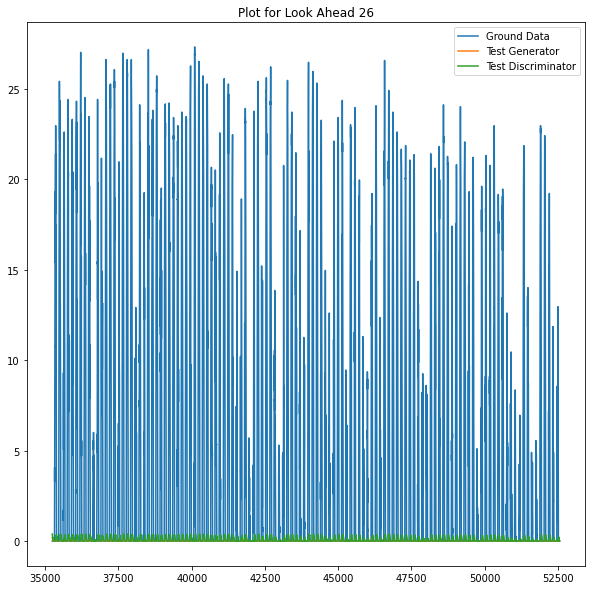

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_84 (LSTM)              (None, 4)                 96        
                                                                 
 dense_252 (Dense)           (None, 16)                80        
                                                                 
 dense_253 (Dense)           (None, 8)                 136       
                                                                 
 dense_254 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
27
Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_85 (LSTM)              

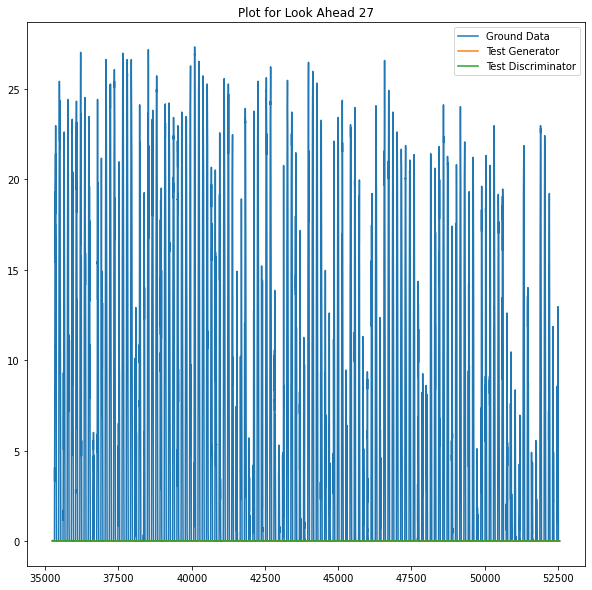

Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_86 (LSTM)              (None, 4)                 96        
                                                                 
 dense_258 (Dense)           (None, 16)                80        
                                                                 
 dense_259 (Dense)           (None, 8)                 136       
                                                                 
 dense_260 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
28
Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_87 (LSTM)              

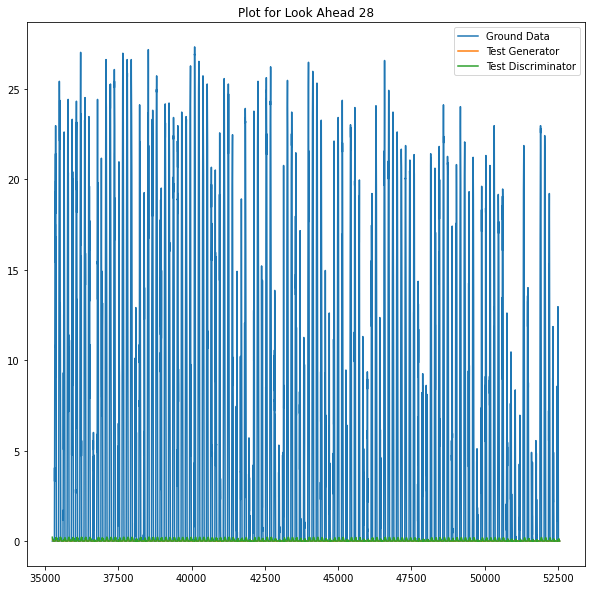

Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_88 (LSTM)              (None, 4)                 96        
                                                                 
 dense_264 (Dense)           (None, 16)                80        
                                                                 
 dense_265 (Dense)           (None, 8)                 136       
                                                                 
 dense_266 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
29
Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_89 (LSTM)              

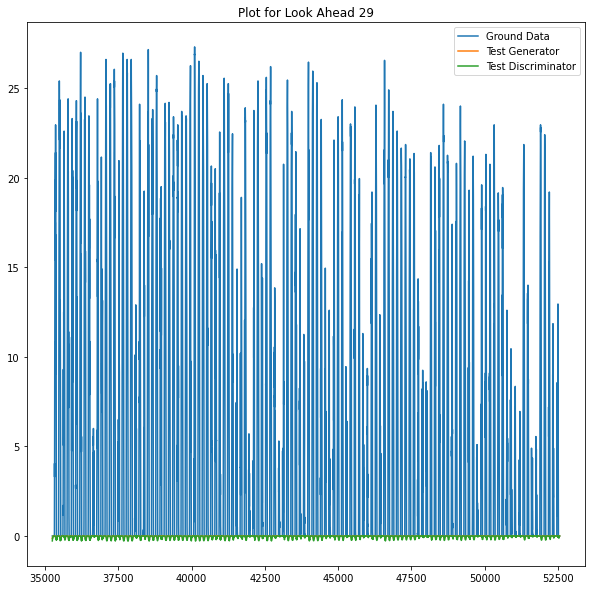

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_90 (LSTM)              (None, 4)                 96        
                                                                 
 dense_270 (Dense)           (None, 16)                80        
                                                                 
 dense_271 (Dense)           (None, 8)                 136       
                                                                 
 dense_272 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
30
Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_91 (LSTM)              

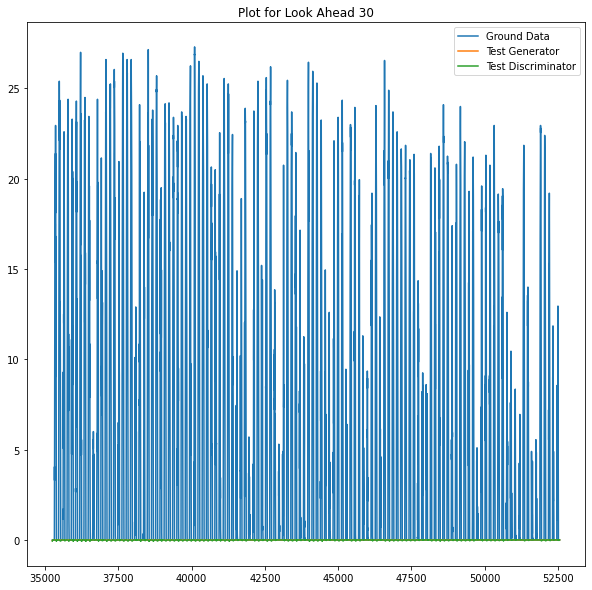

Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_92 (LSTM)              (None, 4)                 96        
                                                                 
 dense_276 (Dense)           (None, 16)                80        
                                                                 
 dense_277 (Dense)           (None, 8)                 136       
                                                                 
 dense_278 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
31
Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_93 (LSTM)              

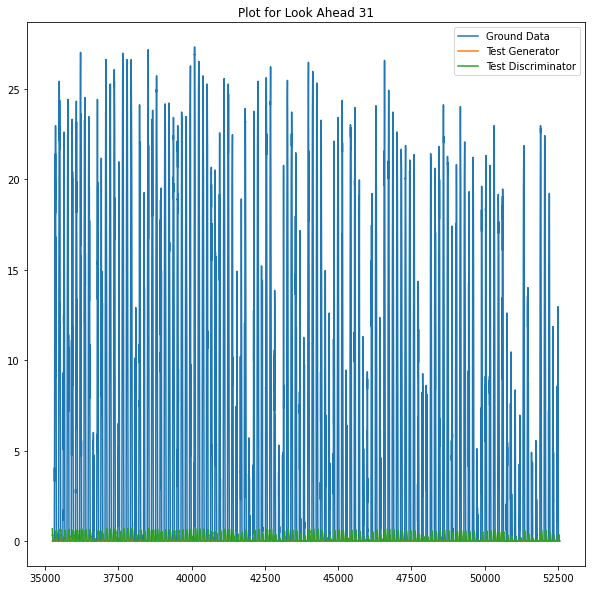

Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_94 (LSTM)              (None, 4)                 96        
                                                                 
 dense_282 (Dense)           (None, 16)                80        
                                                                 
 dense_283 (Dense)           (None, 8)                 136       
                                                                 
 dense_284 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
32
Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_95 (LSTM)              

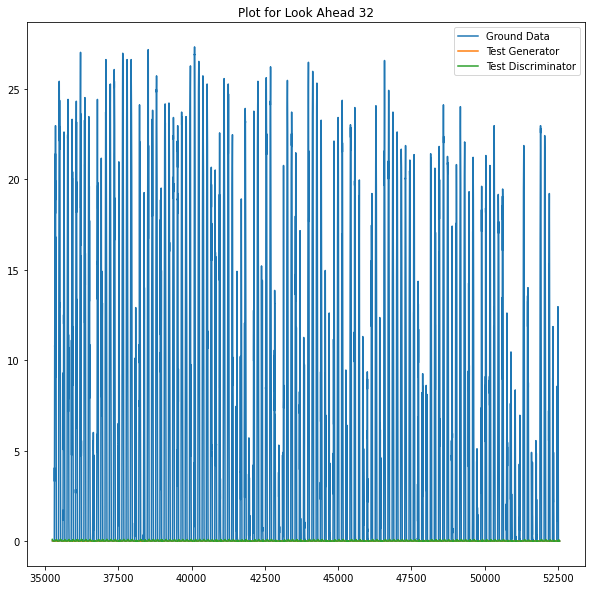

Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_96 (LSTM)              (None, 4)                 96        
                                                                 
 dense_288 (Dense)           (None, 16)                80        
                                                                 
 dense_289 (Dense)           (None, 8)                 136       
                                                                 
 dense_290 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
33
Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_97 (LSTM)              

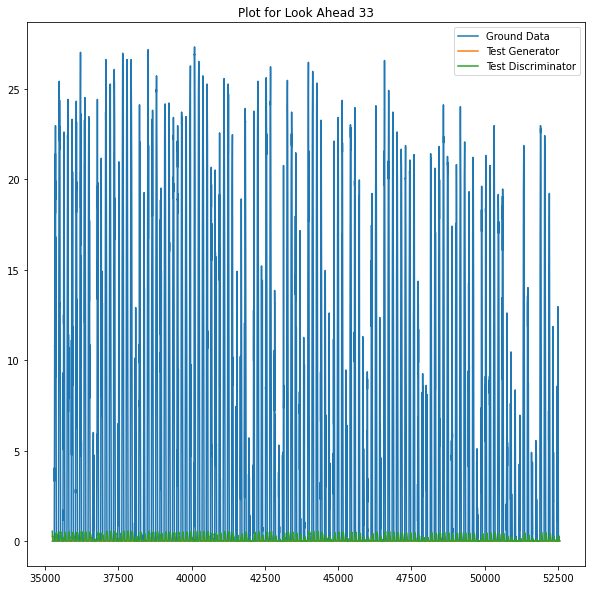

Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_98 (LSTM)              (None, 4)                 96        
                                                                 
 dense_294 (Dense)           (None, 16)                80        
                                                                 
 dense_295 (Dense)           (None, 8)                 136       
                                                                 
 dense_296 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
34
Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_99 (LSTM)              

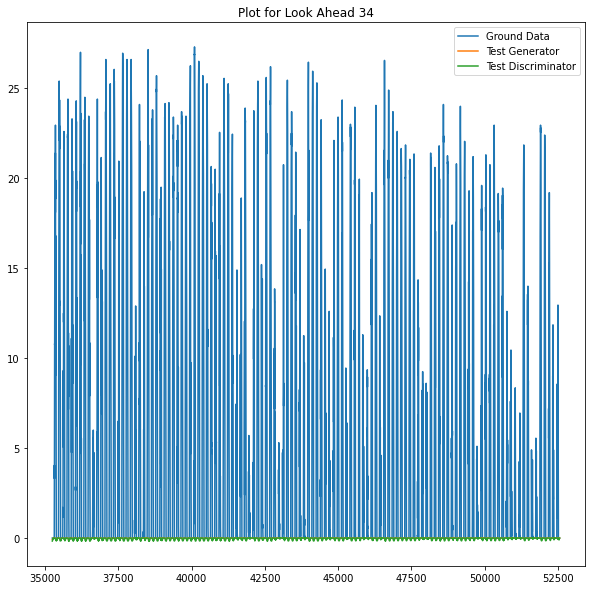

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_100 (LSTM)             (None, 4)                 96        
                                                                 
 dense_300 (Dense)           (None, 16)                80        
                                                                 
 dense_301 (Dense)           (None, 8)                 136       
                                                                 
 dense_302 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
35
Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_101 (LSTM)           

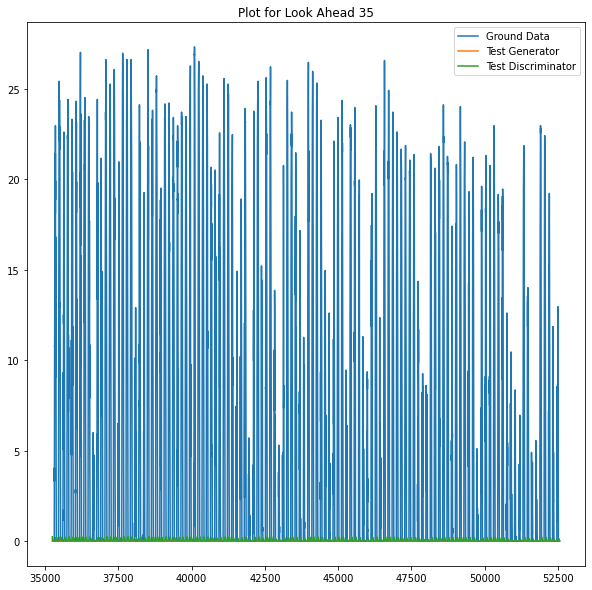

Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_102 (LSTM)             (None, 4)                 96        
                                                                 
 dense_306 (Dense)           (None, 16)                80        
                                                                 
 dense_307 (Dense)           (None, 8)                 136       
                                                                 
 dense_308 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
36
Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_103 (LSTM)           

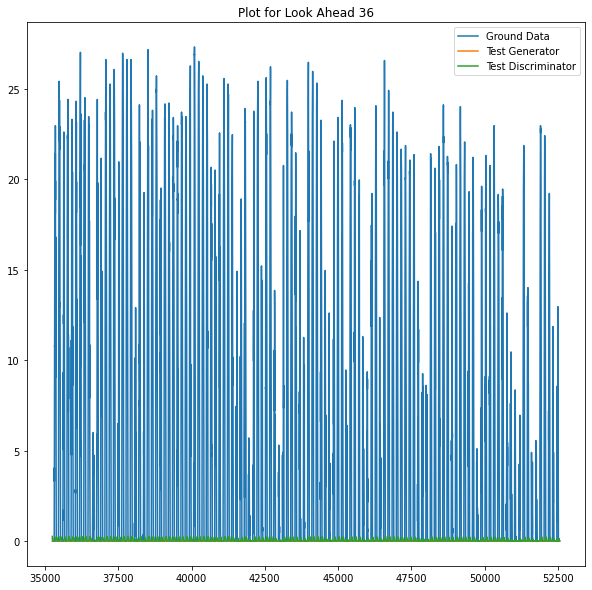

Model: "sequential_104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_104 (LSTM)             (None, 4)                 96        
                                                                 
 dense_312 (Dense)           (None, 16)                80        
                                                                 
 dense_313 (Dense)           (None, 8)                 136       
                                                                 
 dense_314 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
37
Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_105 (LSTM)           

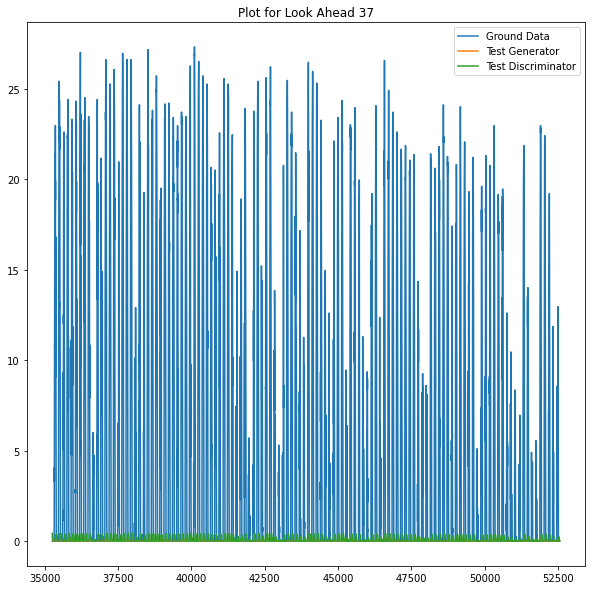

Model: "sequential_106"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_106 (LSTM)             (None, 4)                 96        
                                                                 
 dense_318 (Dense)           (None, 16)                80        
                                                                 
 dense_319 (Dense)           (None, 8)                 136       
                                                                 
 dense_320 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
38
Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_107 (LSTM)           

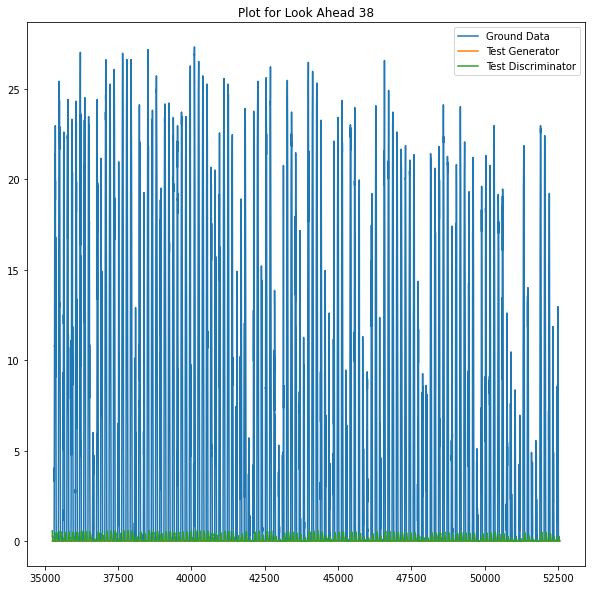

Model: "sequential_108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_108 (LSTM)             (None, 4)                 96        
                                                                 
 dense_324 (Dense)           (None, 16)                80        
                                                                 
 dense_325 (Dense)           (None, 8)                 136       
                                                                 
 dense_326 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
39
Model: "sequential_109"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_109 (LSTM)           

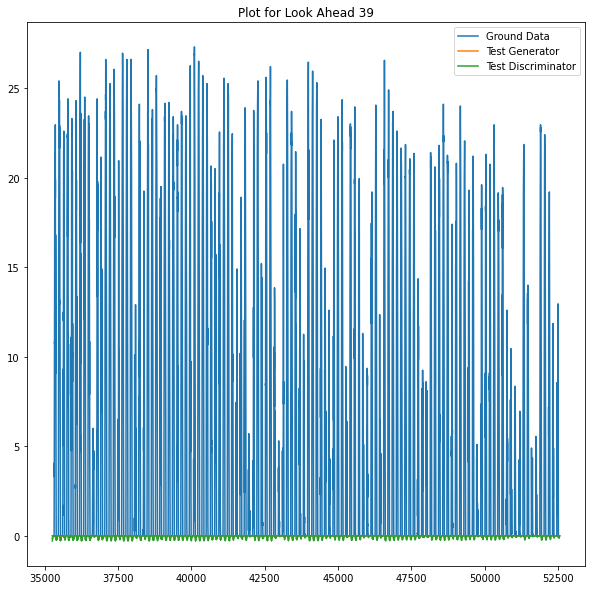

Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_110 (LSTM)             (None, 4)                 96        
                                                                 
 dense_330 (Dense)           (None, 16)                80        
                                                                 
 dense_331 (Dense)           (None, 8)                 136       
                                                                 
 dense_332 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
40
Model: "sequential_111"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_111 (LSTM)           

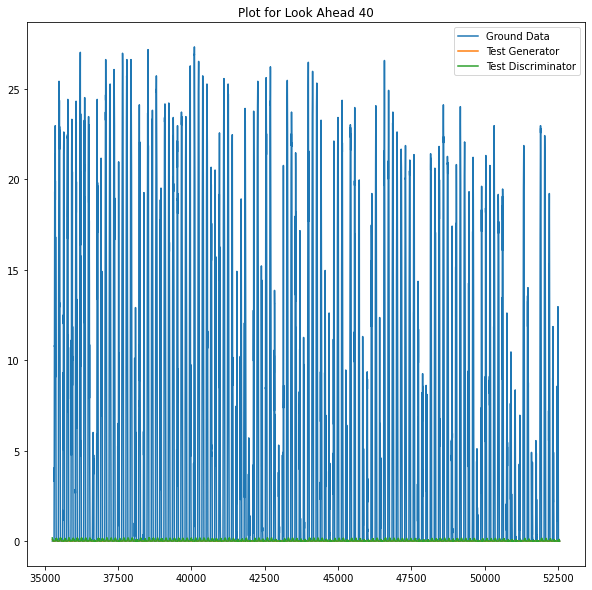

Model: "sequential_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_112 (LSTM)             (None, 4)                 96        
                                                                 
 dense_336 (Dense)           (None, 16)                80        
                                                                 
 dense_337 (Dense)           (None, 8)                 136       
                                                                 
 dense_338 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
41
Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_113 (LSTM)           

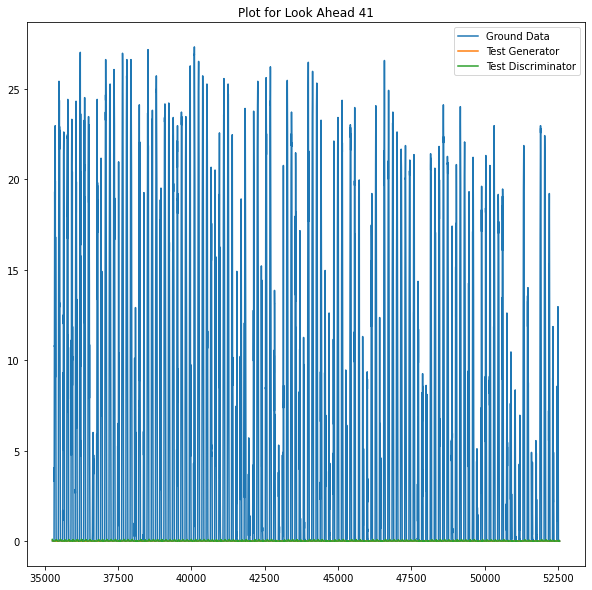

Model: "sequential_114"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_114 (LSTM)             (None, 4)                 96        
                                                                 
 dense_342 (Dense)           (None, 16)                80        
                                                                 
 dense_343 (Dense)           (None, 8)                 136       
                                                                 
 dense_344 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
42
Model: "sequential_115"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_115 (LSTM)           

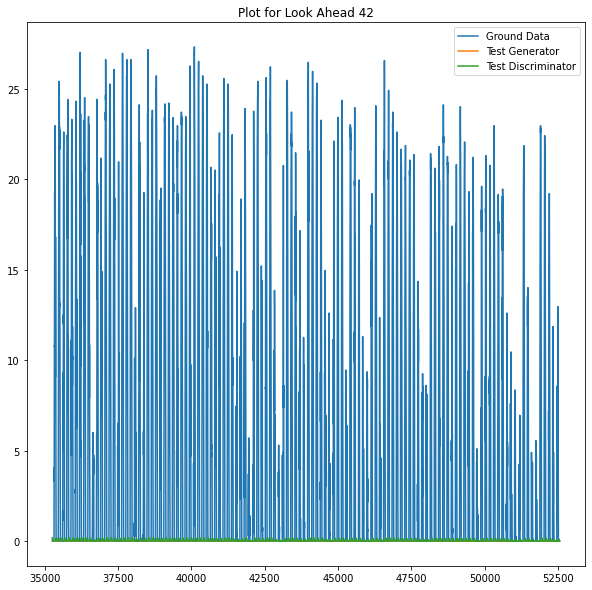

Model: "sequential_116"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_116 (LSTM)             (None, 4)                 96        
                                                                 
 dense_348 (Dense)           (None, 16)                80        
                                                                 
 dense_349 (Dense)           (None, 8)                 136       
                                                                 
 dense_350 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
43
Model: "sequential_117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_117 (LSTM)           

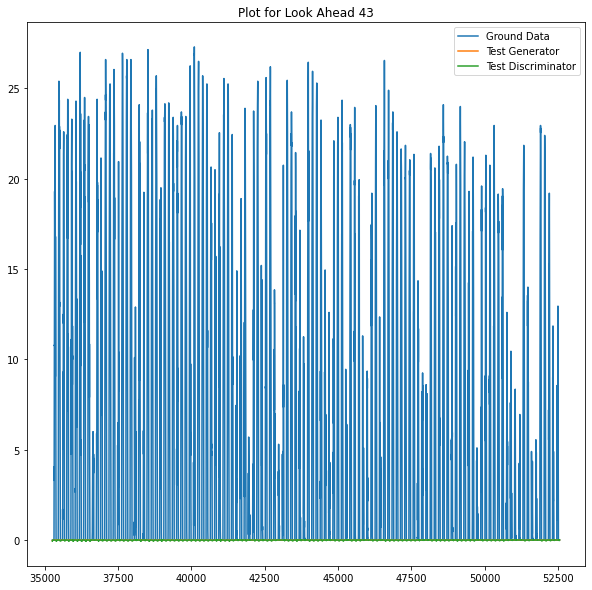

Model: "sequential_118"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_118 (LSTM)             (None, 4)                 96        
                                                                 
 dense_354 (Dense)           (None, 16)                80        
                                                                 
 dense_355 (Dense)           (None, 8)                 136       
                                                                 
 dense_356 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
44
Model: "sequential_119"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_119 (LSTM)           

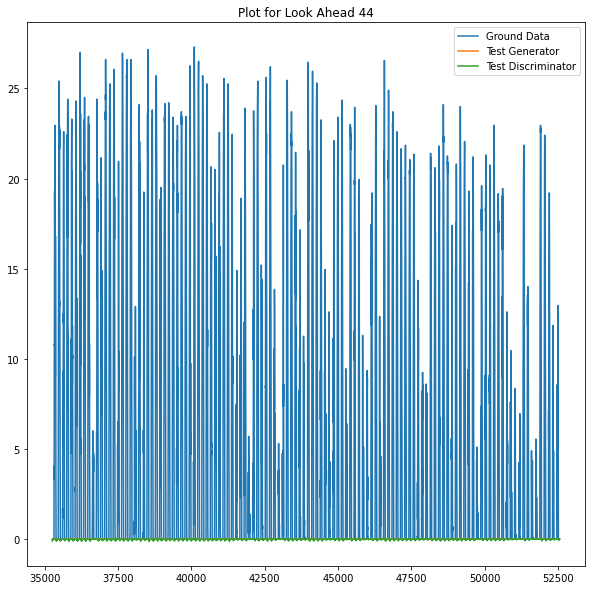

Model: "sequential_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_120 (LSTM)             (None, 4)                 96        
                                                                 
 dense_360 (Dense)           (None, 16)                80        
                                                                 
 dense_361 (Dense)           (None, 8)                 136       
                                                                 
 dense_362 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
45
Model: "sequential_121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_121 (LSTM)           

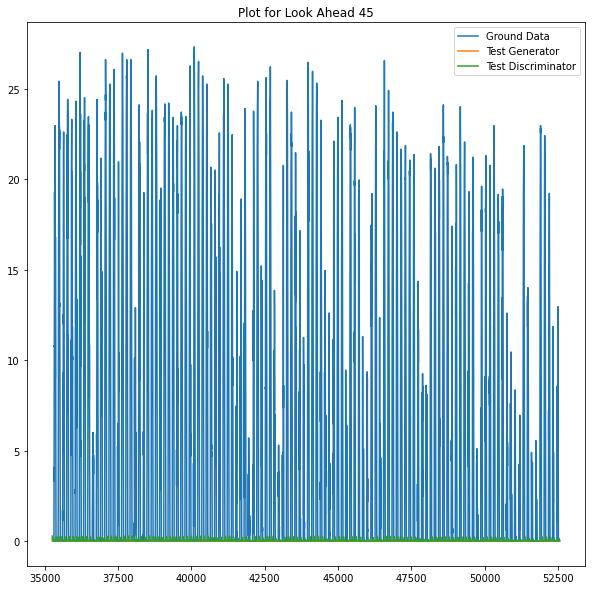

Model: "sequential_122"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_122 (LSTM)             (None, 4)                 96        
                                                                 
 dense_366 (Dense)           (None, 16)                80        
                                                                 
 dense_367 (Dense)           (None, 8)                 136       
                                                                 
 dense_368 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
46
Model: "sequential_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_123 (LSTM)           

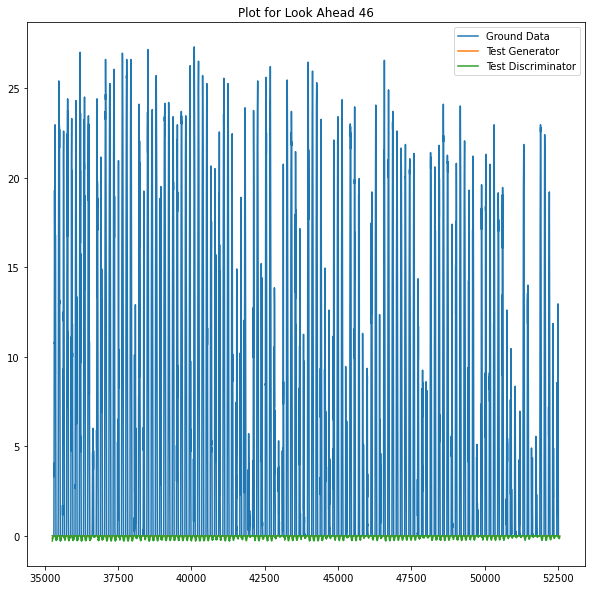

Model: "sequential_124"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_124 (LSTM)             (None, 4)                 96        
                                                                 
 dense_372 (Dense)           (None, 16)                80        
                                                                 
 dense_373 (Dense)           (None, 8)                 136       
                                                                 
 dense_374 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
47
Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_125 (LSTM)           

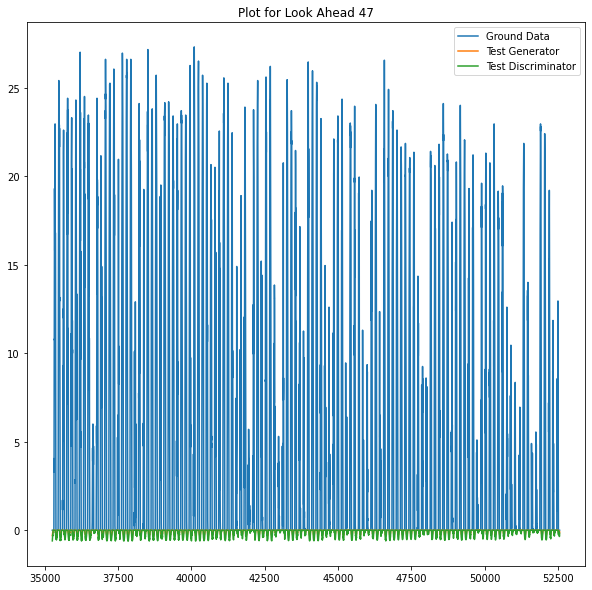

Model: "sequential_126"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_126 (LSTM)             (None, 4)                 96        
                                                                 
 dense_378 (Dense)           (None, 16)                80        
                                                                 
 dense_379 (Dense)           (None, 8)                 136       
                                                                 
 dense_380 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
48
Model: "sequential_127"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_127 (LSTM)           

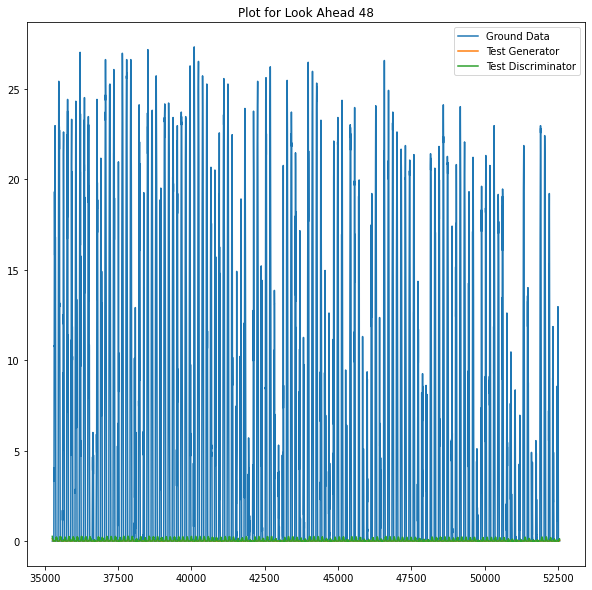

Model: "sequential_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_128 (LSTM)             (None, 4)                 96        
                                                                 
 dense_384 (Dense)           (None, 16)                80        
                                                                 
 dense_385 (Dense)           (None, 8)                 136       
                                                                 
 dense_386 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
49
Model: "sequential_129"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_129 (LSTM)           

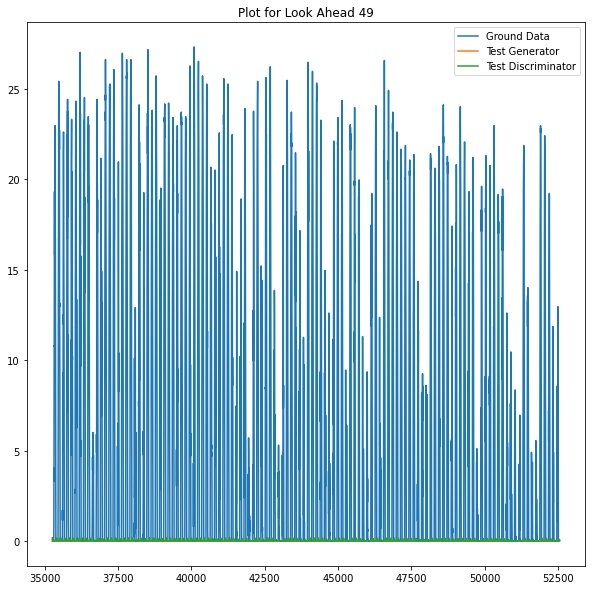

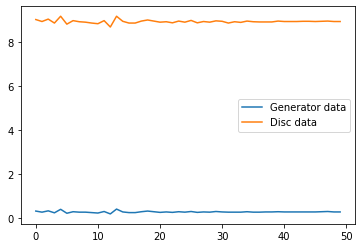

In [12]:
performance = []
for look_ahead in range(50):
    res = [look_ahead]
    scaler, dataset = load_data()
    # split into train and test sets
    # use k-fold later to split
    train_size = int(len(dataset) * 0.67)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    #     print(len(train), len(test))
    look_back = 1
    trainX, trainY = create_dataset(train, look_back, look_ahead)
    testX, testY = create_dataset(test, look_back, look_ahead)
    

    trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))
    model = make_model()
    print(look_ahead)
    trainPredict, gen_testPredict, testY, trainY = fit_generator(model, trainX, trainY, testY)
#     print(trainPredict, testY)
    testScore = gen_results(trainY, testY, trainPredict, gen_testPredict)
    testScore = round(testScore, 2)
    res.append(testScore)
    
    plt.figure(figsize=(10,10))
    
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back * 2) + (look_ahead*2) + 1:len(dataset)-1, :] = gen_testPredict
    
    
    testDataPlot = numpy.empty_like(dataset)
    testDataPlot[:, :] = numpy.nan
    testDataPlot[len(trainPredict)+(look_back * 2) + (look_ahead*2) + 1:len(dataset)-1, :] = scaler.inverse_transform(dataset[len(trainPredict)+(look_back * 2) + (look_ahead*2) + 1:len(dataset)-1])
    plt.plot(testDataPlot, label = "Ground Data")
#     plt.plot(trainPredictPlot, label = "Train Generator")
    plt.plot(testPredictPlot, label = "Test Generator")
    

    dataset,trainX, trainY, testY = init_discriminator(dataset, trainX, trainY, testY)

    disc_model = make_model()
    disc_testPredict, trainPredict, testY, trainY = fit_discriminator(disc_model, trainX, testX, trainY, testY)
    finalScore = final_result(gen_testPredict, disc_testPredict)
    finalScore = round(finalScore, 2)
    res.append(finalScore)
    performance.append(res)
    


    # shift test predictions for plotting
    testDiscPredictPlot = numpy.empty_like(dataset)
    testDiscPredictPlot[:, :] = numpy.nan
    testDiscPredictPlot[len(trainPredict)+(look_back*2)+ (look_ahead * 2) + 1:len(dataset)-1, :] = disc_testPredict + gen_testPredict
    
    plt.plot(testDiscPredictPlot, label = "Test Discriminator")
    plt.title("Plot for Look Ahead " +str(look_ahead))
    plt.legend()
    plt.show()
    
# print(performance)

data = numpy.array(performance)
df = pandas.DataFrame(data,
                 columns=['look_ahead', 'generator', 'disc'])
look_ahead_data= df['look_ahead']
generator_data = df['generator']
disc_data = df['disc']
plt.plot(look_ahead_data, generator_data, label='Generator data')
plt.plot(look_ahead_data, disc_data, label='Disc data')
plt.legend()
plt.show()
# gen_disc_data = df['generator - discriminator']